In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N,D,H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.placeholder(tf.float32, shape=(D,H))
w2 = tf.placeholder(tf.float32, shape=(H,D))

h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)

diff = yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grad_w1,grad_w2 = tf.gradients(loss , [w1,w2])



In [7]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
              y:np.random.randn(N,D)}
    
    out = sess.run([loss , grad_w1 , grad_w2] , feed_dict = values)
    lossVal , grad_w1Val , grad_w2Val = out
    

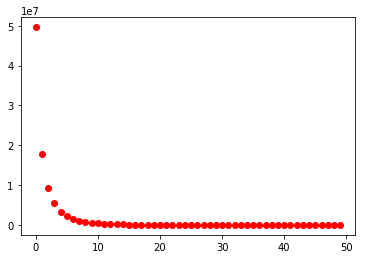

991.2757


In [41]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
    
              y:np.random.randn(N,D)}
    learningRate = 1e-5
    steps = 50
    
    losses=[]
    
    for i in range(steps):
        out = sess.run([loss , grad_w1 , grad_w2] , feed_dict = values)
        lossVal , grad_w1Val , grad_w2Val = out
        
        values[w1] -= learningRate * grad_w1Val
        values[w2] -= learningRate * grad_w2Val
        losses.append(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)
    
        
    
    
    

In [9]:
N,D,H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))


h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)

diff = yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

grad_w1,grad_w2 = tf.gradients(loss , [w1,w2])

learningRate = 1e-5
new_w1 = w1.assign(w1 - learningRate * grad_w1)
new_w2 = w2.assign(w2 - learningRate * grad_w2)



updates = tf.group(new_w1 , new_w2)


49456710.0
17444186.0
9090466.0
5312510.0
3320957.2
2174927.5
1474476.5
1026934.0
729961.7
527039.9
385044.16
284205.56
211416.97
158427.89
119462.016
90554.92
68969.58
52768.0
40542.04
31269.557
24223.246
18851.926
14744.111
11597.07
9180.281
7320.4697
5886.6846
4779.3604
3923.1191
3260.523
2747.1235
2348.5144
2039.2046
1799.146
1612.6597
1467.6982
1354.9818
1267.2596
1198.9846
1145.8027
1104.5002
1072.4451
1047.563
1028.2917
1013.43646
1002.02313
993.26465
986.5849
981.4915
977.6303
974.71094
972.51587
970.88025
969.6674
968.7678
968.1022
967.6101
967.255
966.99976
966.81744
966.6887
966.59753
966.53235
966.4863
966.45355
966.4304
966.41376
966.40204
966.39374
966.38806
966.38354
966.38074
966.3788
966.3771
966.3758
966.3751
966.3744
966.374
966.37366
966.3735
966.3733
966.37317
966.37305
966.3729
966.3729
966.3729
966.37305
966.3728
966.37274
966.3727
966.3728
966.3727
966.3727
966.3727
966.3727
966.37256
966.37256
966.37256
966.3725
966.37256


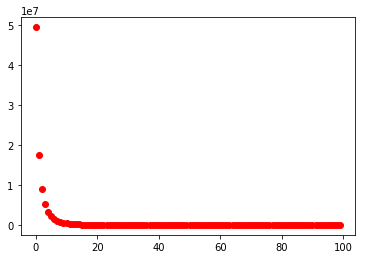

966.37256


In [17]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D) , y:np.random.randn(N,D)}
    
    steps = 100
    
    losses = []
    
    for i in range(steps):
        lossVal ,_ = sess.run([loss, updates],feed_dict=values)
        losses.append(lossVal)
        print(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)
    
    




In [5]:
N,D,H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))


h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)


loss = tf.losses.mean_squared_error(y,yPred)


#diff = yPred - y
#loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

optmizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optmizer.minimize(loss)






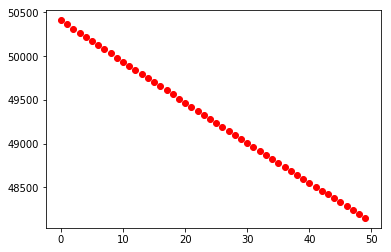

48151.004


In [7]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D) , y:np.random.randn(N,D)}
    
    steps = 50
    
    losses = []
    
    for i in range(steps):
        lossVal ,_ = sess.run([loss, updates],feed_dict=values)
        losses.append(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)
    

In [18]:
N,D,H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))

init = tf.variables_initializer()

h = tf.layers.dense(inputs=x, units=H,activation=tf.nn.relu, kernel_initializer=init)
yPred = tf.layers.dense(inputs=h, units=D,kernel_initializer=init)
loss = tf.losses.mean_squared_error(yPred,y)


h = tf.maximum(tf.matmul(x,w1),0)
yPred = tf.matmul(h,w2)


loss = tf.losses.mean_squared_error(y,yPred)


#diff = yPred - y
#loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))

optmizer = tf.train.GradientDescentOptimizer(1e0)
updates = optmizer.minimize(loss)

TypeError: variables_initializer() missing 1 required positional argument: 'var_list'

In [9]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D) , y:np.random.randn(N,D)}
    
    steps = 50
    
    losses = []
    
    for i in range(steps):
        lossVal ,_ = sess.run([loss, updates],feed_dict=values)
        losses.append(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)

NameError: name 'loss' is not defined

In [15]:
N,D,H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H, input_shape=(D,),activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))
yPred = model(x)

loss = tf.losses.mean_squared_error(yPred,y)
optmizer = tf.train.GradientDescentOptimizer(1e0)
updates = optmizer.minimize(loss)


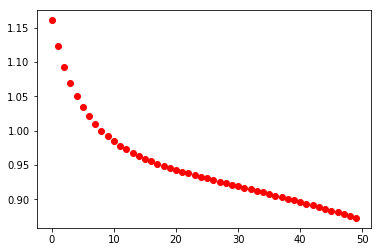

0.87291324


In [16]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D) , y:np.random.randn(N,D)}
    
    steps = 50
    
    losses = []
    
    for i in range(steps):
        lossVal ,_ = sess.run([loss, updates],feed_dict=values)
        losses.append(lossVal)
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    print(lossVal)

In [21]:
N,D,H = 64,1000,100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H,input_shape=(D,),activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))
model.compile(loss=tf.keras.losses.mean_squared_error,optimizer=tf.keras.optimizers.SGD(lr=1e0))
x = np.random.randn(N,D)
y = np.random.randn(N,D)
history = model.fit(x, y, epochs=50,batch_size=N)

Epoch 1/50
64/64 [==============================] - 1s 10ms/step - loss: 1.1548
Epoch 2/50
64/64 [==============================] - 0s 156us/step - loss: 1.1199
Epoch 3/50
64/64 [==============================] - 0s 219us/step - loss: 1.0925
Epoch 4/50
64/64 [==============================] - 0s 266us/step - loss: 1.0703
Epoch 5/50
64/64 [==============================] - 0s 234us/step - loss: 1.0521
Epoch 6/50
64/64 [==============================] - 0s 141us/step - loss: 1.0370
Epoch 7/50
64/64 [==============================] - 0s 125us/step - loss: 1.0242
Epoch 8/50
64/64 [==============================] - 0s 125us/step - loss: 1.0133
Epoch 9/50
64/64 [==============================] - 0s 125us/step - loss: 1.0040
Epoch 10/50
64/64 [==============================] - 0s 156us/step - loss: 0.9958
Epoch 11/50
64/64 [==============================] - 0s 219us/step - loss: 0.9887
Epoch 12/50
64/64 [==============================] - 0s 203us/step - loss: 0.9825
Epoch 13/50
64/64 [=======